In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('hr_employee_churn_data.csv')

In [3]:
print(df.head())

   empid  satisfaction_level  last_evaluation  number_project  \
0      1                0.38             0.53               2   
1      2                0.80             0.86               5   
2      3                0.11             0.88               7   
3      4                0.72             0.87               5   
4      5                0.37             0.52               2   

   average_montly_hours  time_spend_company  Work_accident  \
0                   157                   3              0   
1                   262                   6              0   
2                   272                   4              0   
3                   223                   5              0   
4                   159                   3              0   

   promotion_last_5years  salary  left  
0                      0     low     1  
1                      0  medium     1  
2                      0  medium     1  
3                      0     low     1  
4                      0     lo

FEATURE ENGINEERING

In [10]:
df2 = df.copy()
df2.drop(['empid'] , axis =1 , inplace = True)
print(df2.head())

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  promotion_last_5years  salary  left  
0                   3              0                      0     low     1  
1                   6              0                      0  medium     1  
2                   4              0                      0  medium     1  
3                   5              0                      0     low     1  
4                   3              0                      0     low     1  


In [11]:
df2.isnull().sum()

satisfaction_level       2
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
salary                   0
left                     0
dtype: int64

In [14]:
df2['satisfaction_level'].describe()

count    14997.000000
mean         0.612863
std          0.248634
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

In [15]:
df2['satisfaction_level'].fillna(df2['satisfaction_level'].mean() , inplace =True)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_16668\3862678156.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['satisfaction_level'].fillna(df2['satisfaction_level'].mean() , inplace =True)


In [16]:
df2.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
salary                   0
left                     0
dtype: int64

In [17]:
#categorical feature 'salary'
df2['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [19]:
dummy = pd.get_dummies(df2['salary'] , drop_first = True)
dummy

,low,medium
0,True,False
1,False,True
2,False,True
3,True,False
4,True,False
...,...,...
14994,True,False
14995,True,False
14996,True,False
14997,True,False


In [28]:
df2 = pd.concat([df2,dummy] , axis = 1)

In [29]:
df2

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left,low,medium
0,0.38,0.53,2,157,3,0,0,low,1,True,False
1,0.80,0.86,5,262,6,0,0,medium,1,False,True
2,0.11,0.88,7,272,4,0,0,medium,1,False,True
3,0.72,0.87,5,223,5,0,0,low,1,True,False
4,0.37,0.52,2,159,3,0,0,low,1,True,False
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,low,1,True,False
14995,0.37,0.48,2,160,3,0,0,low,1,True,False
14996,0.37,0.53,2,143,3,0,0,low,1,True,False
14997,0.11,0.96,6,280,4,0,0,low,1,True,False


In [30]:
df2.drop(['salary'] , axis = 1 , inplace = True)

In [31]:
df2

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,low,medium
0,0.38,0.53,2,157,3,0,0,1,True,False
1,0.80,0.86,5,262,6,0,0,1,False,True
2,0.11,0.88,7,272,4,0,0,1,False,True
3,0.72,0.87,5,223,5,0,0,1,True,False
4,0.37,0.52,2,159,3,0,0,1,True,False
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,1,True,False
14995,0.37,0.48,2,160,3,0,0,1,True,False
14996,0.37,0.53,2,143,3,0,0,1,True,False
14997,0.11,0.96,6,280,4,0,0,1,True,False


In [51]:
#splitting data into train and test
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

In [33]:
X = df2.drop(['left'] , axis = 1)
Y = df2['left']

In [36]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.2 , stratify = Y , random_state = 0)

In [41]:
print(len(X_train))
len(X_test)

11999


3000

In [44]:
model = XGBClassifier(objective = 'binary:logistic' , learning_rate = 0.1 , max_depth = 20 , n_estimators = 200) 

In [49]:
model.fit(X_train , Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [50]:
model.score(X_test , Y_test)

0.9913333333333333

In [52]:
cm = confusion_matrix(Y_test , model.predict(X_test))
print(cm)

[[2282    4]
 [  22  692]]


Text(50.722222222222214, 0.5, 'True Value')

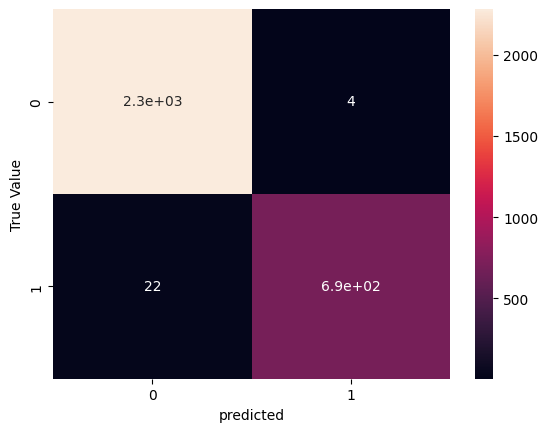

In [54]:
sns.heatmap(cm , annot = True)
plt.xlabel('predicted')
plt.ylabel('True Value')